## Maxpooling Layer
we will add and visualize the output of a maxpooling layer in a CNN.

A convolutional layer + activation function, followed by a pooling layer, and a linear layer (to create a desired output size) make up the basic layers of a CNN.

###### Import the image

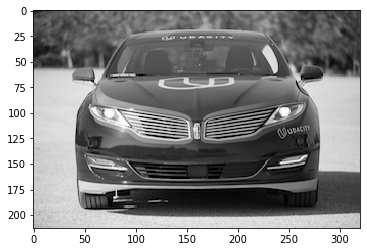

In [1]:
#Import libraries
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
#Read image
image1=cv2.imread('data/udacity_sdc.png')
#Convert image to grayscale
gray_image=cv2.cvtColor(image1,cv2.COLOR_BGR2GRAY)
#Normalize,rescale entries to lie in [0,1] 
gray_image=gray_image.astype("float32")/255
#Show image
plt.imshow(gray_image,cmap="gray")

###### Define and visualize the filters

In [2]:
import numpy as np
#Define filter
filter_values=np.array([[-1,-1,1,1],[-1,-1,1,1],[-1,-1,1,1],[-1,-1,1,1]])
print('Filter Shape:',filter_values.shape)

Filter Shape: (4, 4)


In [3]:
#Defining different filters
#all of which are linear combinations of the `filter_values` defined above
#Define four filters
filter_1=filter_values
filter_2=-filter_1
filter_3=filter_1.T
filter_4=-filter_3
filters=np.array([filter_1,filter_2,filter_3,filter_4])
print('Filter 1:\n',filter_1)
print('Filter 2:\n',filter_2)
print('Filter 3:\n',filter_3)
print('Filter 4:\n',filter_4)

Filter 1:
 [[-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]]
Filter 2:
 [[ 1  1 -1 -1]
 [ 1  1 -1 -1]
 [ 1  1 -1 -1]
 [ 1  1 -1 -1]]
Filter 3:
 [[-1 -1 -1 -1]
 [-1 -1 -1 -1]
 [ 1  1  1  1]
 [ 1  1  1  1]]
Filter 4:
 [[ 1  1  1  1]
 [ 1  1  1  1]
 [-1 -1 -1 -1]
 [-1 -1 -1 -1]]


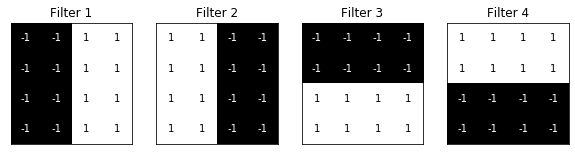

In [4]:
#Show all four filters
fig=plt.figure(figsize=(10,5))
for i in range(4):
    ax=fig.add_subplot(1,4,i+1,xticks=[],yticks=[])
    ax.imshow(filters[i],cmap="gray")
    ax.set_title('Filter %s'%str(i+1))
    width,height=filters[i].shape
    for x in range(width):
        for y in range(height):
            ax.annotate(str(filters[i][x][y]),xy=(y,x),
            horizontalalignment='center',
            verticalalignment='center',
            color='white' if filters[i][x][y]<0 else 'black')

###### Define convolutional and pooling layers
We initialize a convolutional layer so that it contains all the created filters. Then add a [maxpooling layer](http://pytorch.org/docs/stable/_modules/torch/nn/modules/pooling.html), with a kernel size of (2x2) so we can see that the image resolution has been reduced after this step!

A maxpooling layer reduces the x-y size of an input and only keeps the most *active* pixel values. Below is an example of a 2x2 pooling kernel, with a stride of 2, applied to a small patch of grayscale pixel values; reducing the x-y size of the patch by a factor of 2. Only the maximum pixel values in 2x2 remain in the new, pooled output.

In [5]:
#Import Libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
#Define network with single convolutional layer with four filters, AND a pooling layer of size (2,2)
class Network(nn.Module):
    def __init__(self,weight):
        super(Network,self).__init__()
        #Initializes weights of convolutional layer to be weights of the 4 defined filters
        k_height,k_width= weight.shape[2:]
        #When there are 4 grayscale filters
        self.conv=nn.Conv2d(1,4,kernel_size=(k_height,k_width),bias=False)
        self.conv.weight=torch.nn.Parameter(weight)
        #Define Pooling layer
        self.pool=nn.MaxPool2d(2,2)
    def forward(self,x):
        #Count output layer
        #pre activation
        conv_x=self.conv(x)
        #post activation
        activated_x=F.relu(conv_x)
        #Applies pooling layer
        pool_x=self.pool(activated_x)
        #Return All layers
        return conv_x,activated_x,pool_x
#Set weights
weight=torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)
model=Network(weight)
#print layer
print(model)

Network(
  (conv): Conv2d(1, 4, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)


###### Visualize the output of each filter

In [6]:
#Define function to visualize output layer
#Default filter=4
def visual_layer(layer,n_filters=4):
    fig=plt.figure(figsize=(20,20)) 
    for i in range(n_filters):
        ax=fig.add_subplot(1, n_filters,i+1,xticks=[],yticks=[])
        #Output Layers
        ax.imshow(np.squeeze(layer[0,i].data.numpy()),cmap='gray')
        ax.set_title('Output %s' % str(i+1))

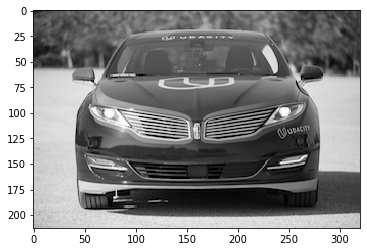

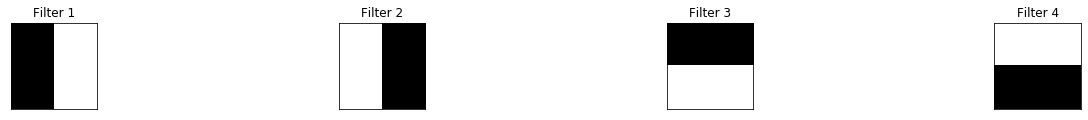

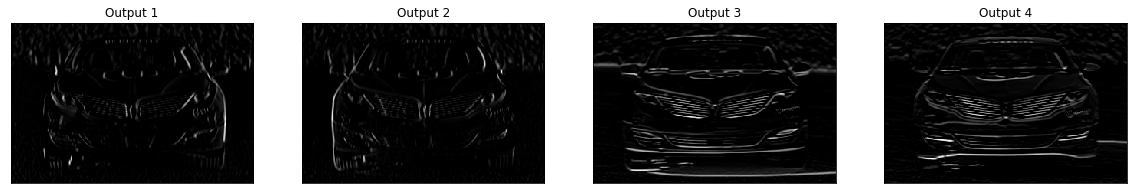

In [7]:
#Show original image in grayscale
plt.imshow(gray_image,cmap='gray')
#Show all filters
fig=plt.figure(figsize=(12,6))
fig.subplots_adjust(left=0,right=1.5,bottom=0.8,top=1,hspace=0.05,wspace=0.05)
for i in range(4):
    ax=fig.add_subplot(1,4,i+1,xticks=[],yticks=[])
    ax.imshow(filters[i],cmap="gray")
    ax.set_title('Filter %s'%str(i+1))
    
#Convert image to Input tensor
gray_image_tensor=torch.from_numpy(gray_image).unsqueeze(0).unsqueeze(1)
#Get Conv layer(pre & post activation)
conv_layer,activated_layer,pooled_layer=model(gray_image_tensor)
#Show output conv layer
visual_layer(activated_layer)

###### Visualize the output of the pooling layer

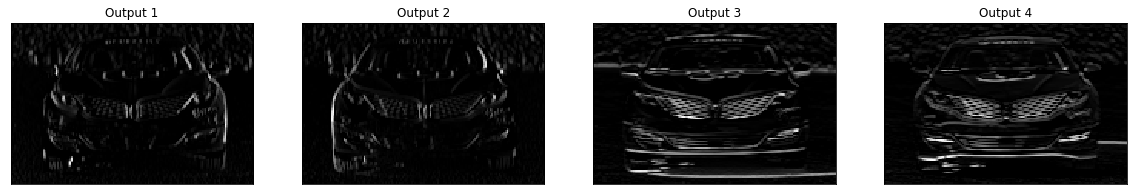

In [8]:
#Show output of pooling layer
visual_layer(pooled_layer)